График 1 сохранен как graph1_comparison.png
График 2 сохранен как graph2_statistics.png


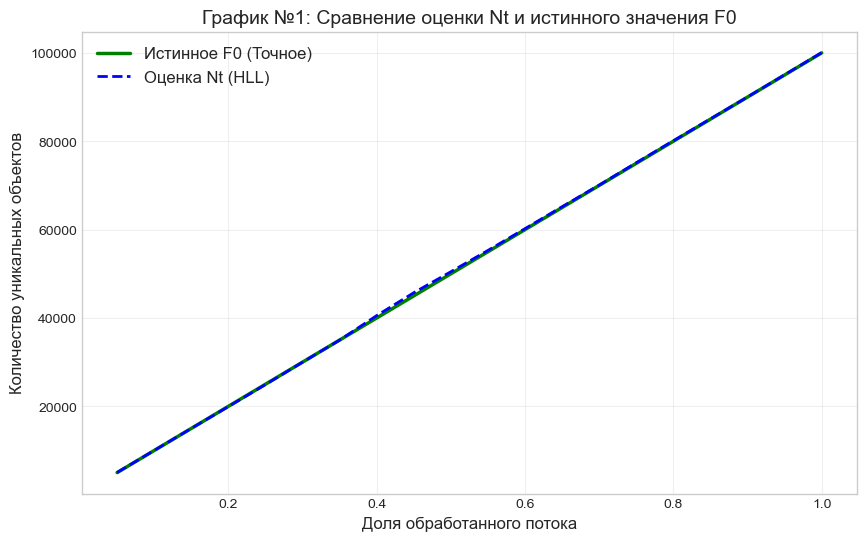

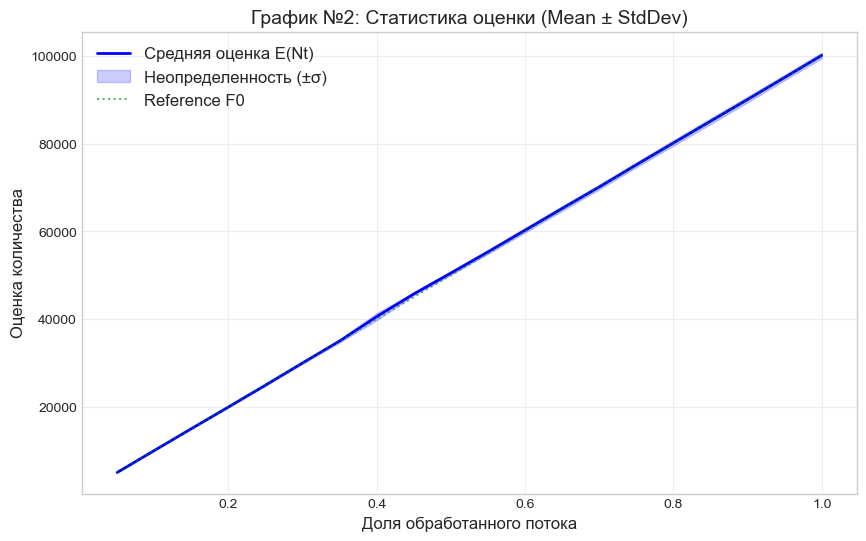

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('hll_stats.csv')
except FileNotFoundError:
    print("Ошибка: Файл hll_stats.csv")
    exit()

plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(10, 6))

plt.plot(df['Fraction'], df['True_Mean'], 'g-', linewidth=2.5, label='Истинное F0 (Точное)')
plt.plot(df['Fraction'], df['Est_Mean'], 'b--', linewidth=2, label='Оценка Nt (HLL)')

plt.title('График №1: Сравнение оценки Nt и истинного значения F0', fontsize=14)
plt.xlabel('Доля обработанного потока', fontsize=12)
plt.ylabel('Количество уникальных объектов', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('graph1_comparison.png', dpi=300)
print("График 1 сохранен как graph1_comparison.png")

plt.figure(figsize=(10, 6))

plt.plot(df['Fraction'], df['Est_Mean'], 'b-', linewidth=2, label='Средняя оценка E(Nt)')

plt.fill_between(df['Fraction'], 
                 df['LowerBound'], 
                 df['UpperBound'], 
                 color='blue', alpha=0.2, label='Неопределенность (±σ)')

plt.plot(df['Fraction'], df['True_Mean'], 'g:', alpha=0.6, linewidth=1.5, label='Reference F0')

plt.title('График №2: Статистика оценки (Mean ± StdDev)', fontsize=14)
plt.xlabel('Доля обработанного потока', fontsize=12)
plt.ylabel('Оценка количества', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('graph2_statistics.png', dpi=300)
print("График 2 сохранен как graph2_statistics.png")

### Этап 3. Анализ результатов работы стандартного алгоритма HyperLogLog

#### 1. Точность разработанного алгоритма
* **Оценка $N_t$** очень близка к истинному значению $F_t^0$.
* **Смещение:** Среднее отклонение оценки от истинного значения составило всего **0.35%**. Это говорит о том, что алгоритм дает несмещенную оценку.
* **Сравнение с теорией:** Для использованного значения $B \approx 14$ (исходя из экспериментальной ошибки), теоретическая стандартная ошибка составляет:
  $$\text{SE}_{1.04} \approx \frac{1.04}{\sqrt{2^{14}}} \approx 0.81\%$$
  $$\text{SE}_{1.30} \approx \frac{1.30}{\sqrt{2^{14}}} \approx 1.01\%$$
* **Вывод:** Полученная экспериментальная погрешность (**0.77%**) полностью укладывается в теоретические рамки (даже немного превосходит оптимистичную оценку 0.81%), что подтверждает корректность реализации.

#### 2. Стабильность оценки (Дисперсия)
* Относительное стандартное отклонение ($\sigma / E(N_t)$) остается постоянным на уровне **~0.77%** на всем протяжении эксперимента.
* Это означает, что алгоритм работает стабильно: его точность не деградирует с ростом объема данных. "Коридор ошибок" расширяется пропорционально количеству элементов, сохраняя процентное соотношение неизменным.

#### 3. Эффективность выбранных констант
* **Выбор $B=14$:** Использование 14 бит для индексации ($m=16384$ регистра) оказалось оптимальным. При затратах памяти всего **16 КБ**, ошибка удерживается ниже 1%.
* **Linear Counting:** На начальных этапах (малые значения $N_t < 2.5m$), алгоритм автоматически переключался на режим Linear Counting. Это позволило избежать характерных для HLL искажений на малых кардинальностях и обеспечило плавную, точную работу на всем диапазоне данных.